In [261]:
# Data cleaning 
# Data Visualization
# !pip install geopandas
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np
 
# 'Pandas' is used for data manipulation and analysis
import pandas as pd
 
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline
 
# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns
 
import geopandas as gpd

In [263]:
adolescent = pd.read_csv("adolescent-birth-rate.csv")
adolescent['Year'] = adolescent['Year'].astype(str)
adolescent.head(15)

,"Countries, territories and areas",Year,Adolescent birth rate (per 1000 women)
0,Afghanistan,2017,62
1,Afghanistan,2014,77.2 0.2
2,Afghanistan,2013,87 0.9
3,Afghanistan,2011,2.2
4,Afghanistan,2009,80 0.8
5,Afghanistan,2008,90 1.4
6,Afghanistan,2007,103
7,Afghanistan,2006,126.2 4.3
8,Afghanistan,2005,117.4 8.2
9,Afghanistan,2004,135.7


In [264]:
def split(df):
    df["Year"] = df.Year.map(lambda s: s.split("-"))   # convert year range into list
    df_split = df.explode("Year")  # explode lists into multiple rows
    df_split.head()
    return df_split

In [265]:
birth_attended = pd.read_csv("births-attended-by-skilled-health-personnel.csv")
birth_attended.head(10)
birth_attended1= split(birth_attended)
# birth_attended1.dtypes

In [266]:
merged_df1 = pd.merge(adolescent, birth_attended1, on=['Year', 'Countries, territories and areas'])
merged_df1.head()

,"Countries, territories and areas",Year,Adolescent birth rate (per 1000 women),Births attended by skilled health personnel (%)
0,Afghanistan,2017,62,53.4
1,Afghanistan,2014,77.2 0.2,45.2
2,Afghanistan,2013,87 0.9,45.2
3,Afghanistan,2011,2.2,39.9
4,Afghanistan,2011,2.2,38.6


In [267]:
family_planning = pd.read_csv("Family planning needs satisfied.csv")
family_planning.head(10)
family_planning1= split(family_planning)
family_planning1['Women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (%)'] = family_planning1['Women of reproductive age (15âˆ’49 years) who are married or in-union who have their need for family planning satisfied with modern methods (%), UNPD'].combine_first(family_planning1['Women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (%)'])
family_planning1.drop('Women of reproductive age (15âˆ’49 years) who are married or in-union who have their need for family planning satisfied with modern methods (%), UNPD',axis=1, inplace=True)


In [268]:
merged_df = pd.merge(family_planning1, merged_df1, on=['Year', 'Countries, territories and areas'])
merged_df.head(20)

,"Countries, territories and areas",Year,Women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (%),Adolescent birth rate (per 1000 women),Births attended by skilled health personnel (%)
0,Afghanistan,2017,42.8,62,53.4
1,Afghanistan,2014,39.2,77.2 0.2,45.2
2,Afghanistan,2013,37.8,87 0.9,45.2
3,Afghanistan,2011,37.0,2.2,39.9
4,Afghanistan,2011,37.0,2.2,38.6
5,Afghanistan,2003,27.7,151.8 8.1,14.3
6,Albania,2018,7.7,14.3 0.3,99.8
7,Albania,2018,6.3,14.3 0.3,99.8
8,Albania,2017,6.3,15.9 0.2,99.8
9,Albania,2017,7.5,15.9 0.2,99.8


In [269]:
stillbirth = pd.read_csv("stillbirth-rate.csv",header=[1])
stillbirth.head(10)
stillbirth_melted = stillbirth.melt(id_vars=["Countries, territories and areas"], var_name="Year", value_name="StillBirthRate")
# # melted = stillbirth.melt(id_vars=["Countries, territories and areas"], var_name="Year", value_name="StillBirthRate")
# df = melted.astype({"Year": "int"})
stillbirth_melted['Year'] = stillbirth_melted['Year'].astype(str)
stillbirth_melted["StillBirthRate"] = stillbirth_melted.StillBirthRate.map(lambda s: float(s.split(" ")[0]))

stillbirth_melted.head(10)
# df.head()

,"Countries, territories and areas",Year,StillBirthRate
0,Afghanistan,2021,25.68
1,Albania,2021,4.34
2,Algeria,2021,9.82
3,Andorra,2021,2.29
4,Angola,2021,19.30
5,Antigua and Barbuda,2021,5.16
6,Argentina,2021,4.30
7,Armenia,2021,10.82
8,Australia,2021,2.39
9,Austria,2021,2.44


In [258]:
merged_with_output = pd.merge(stillbirth_melted, merged_df, on=['Year', 'Countries, territories and areas'])
merged_with_output = merged_with_output.reindex(columns=['Countries, territories and areas', 'Year', 'Women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (%)',"Adolescent birth rate (per 1000 women)","Births attended by skilled health personnel (%)","StillBirthRate"])
merged_with_output.head(20)



,"Countries, territories and areas",Year,Women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (%),Adolescent birth rate (per 1000 women),Births attended by skilled health personnel (%),StillBirthRate
0,Antigua and Barbuda,2020,77.4,30.4 0.3,99.0,5.26
1,Azerbaijan,2020,31.3,42.2,99.9,8.90
2,Belize,2020,70.2,55.4 1,94.6,6.89
3,Georgia,2020,50.6,27.3 0,99.8,5.73
4,Oman,2020,39.6,7.5 0.1,99.9,5.68
5,Peru,2020,69.1,0.8,95.7,6.76
6,Republic of Moldova,2020,65.5,18.4 0.1,99.6,7.08
7,Uzbekistan,2020,83.7,0,100.0,6.06
8,Viet Nam,2020,78.8,29,96.1,8.12
9,Argentina,2019,84.0,40.9 1.1,98.8,4.89


In [270]:
print(f"IQR Stats {birth_attended1.describe()}")

IQR Stats        Births attended by skilled health personnel (%)
count                                      2219.000000
mean                                         89.335196
std                                          19.398963
min                                           5.600000
25%                                          90.400000
50%                                          98.700000
75%                                          99.800000
max                                         100.000000


In [271]:
print(f"IQR Stats {family_planning1.describe()}")

IQR Stats        Women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (%)
count                                        9640.000000                                                                     
mean                                           48.578361                                                                     
std                                            25.208300                                                                     
min                                             0.300000                                                                     
25%                                            29.500000                                                                     
50%                                            50.600000                                                                     
75%                                            70.200000                                                    

Text(0.3, 0.01, 'The measurement is a proportion of demand satisfied by modern methods based on contraceptive prevalence (any method and modern methods) and unmet need for family planning')

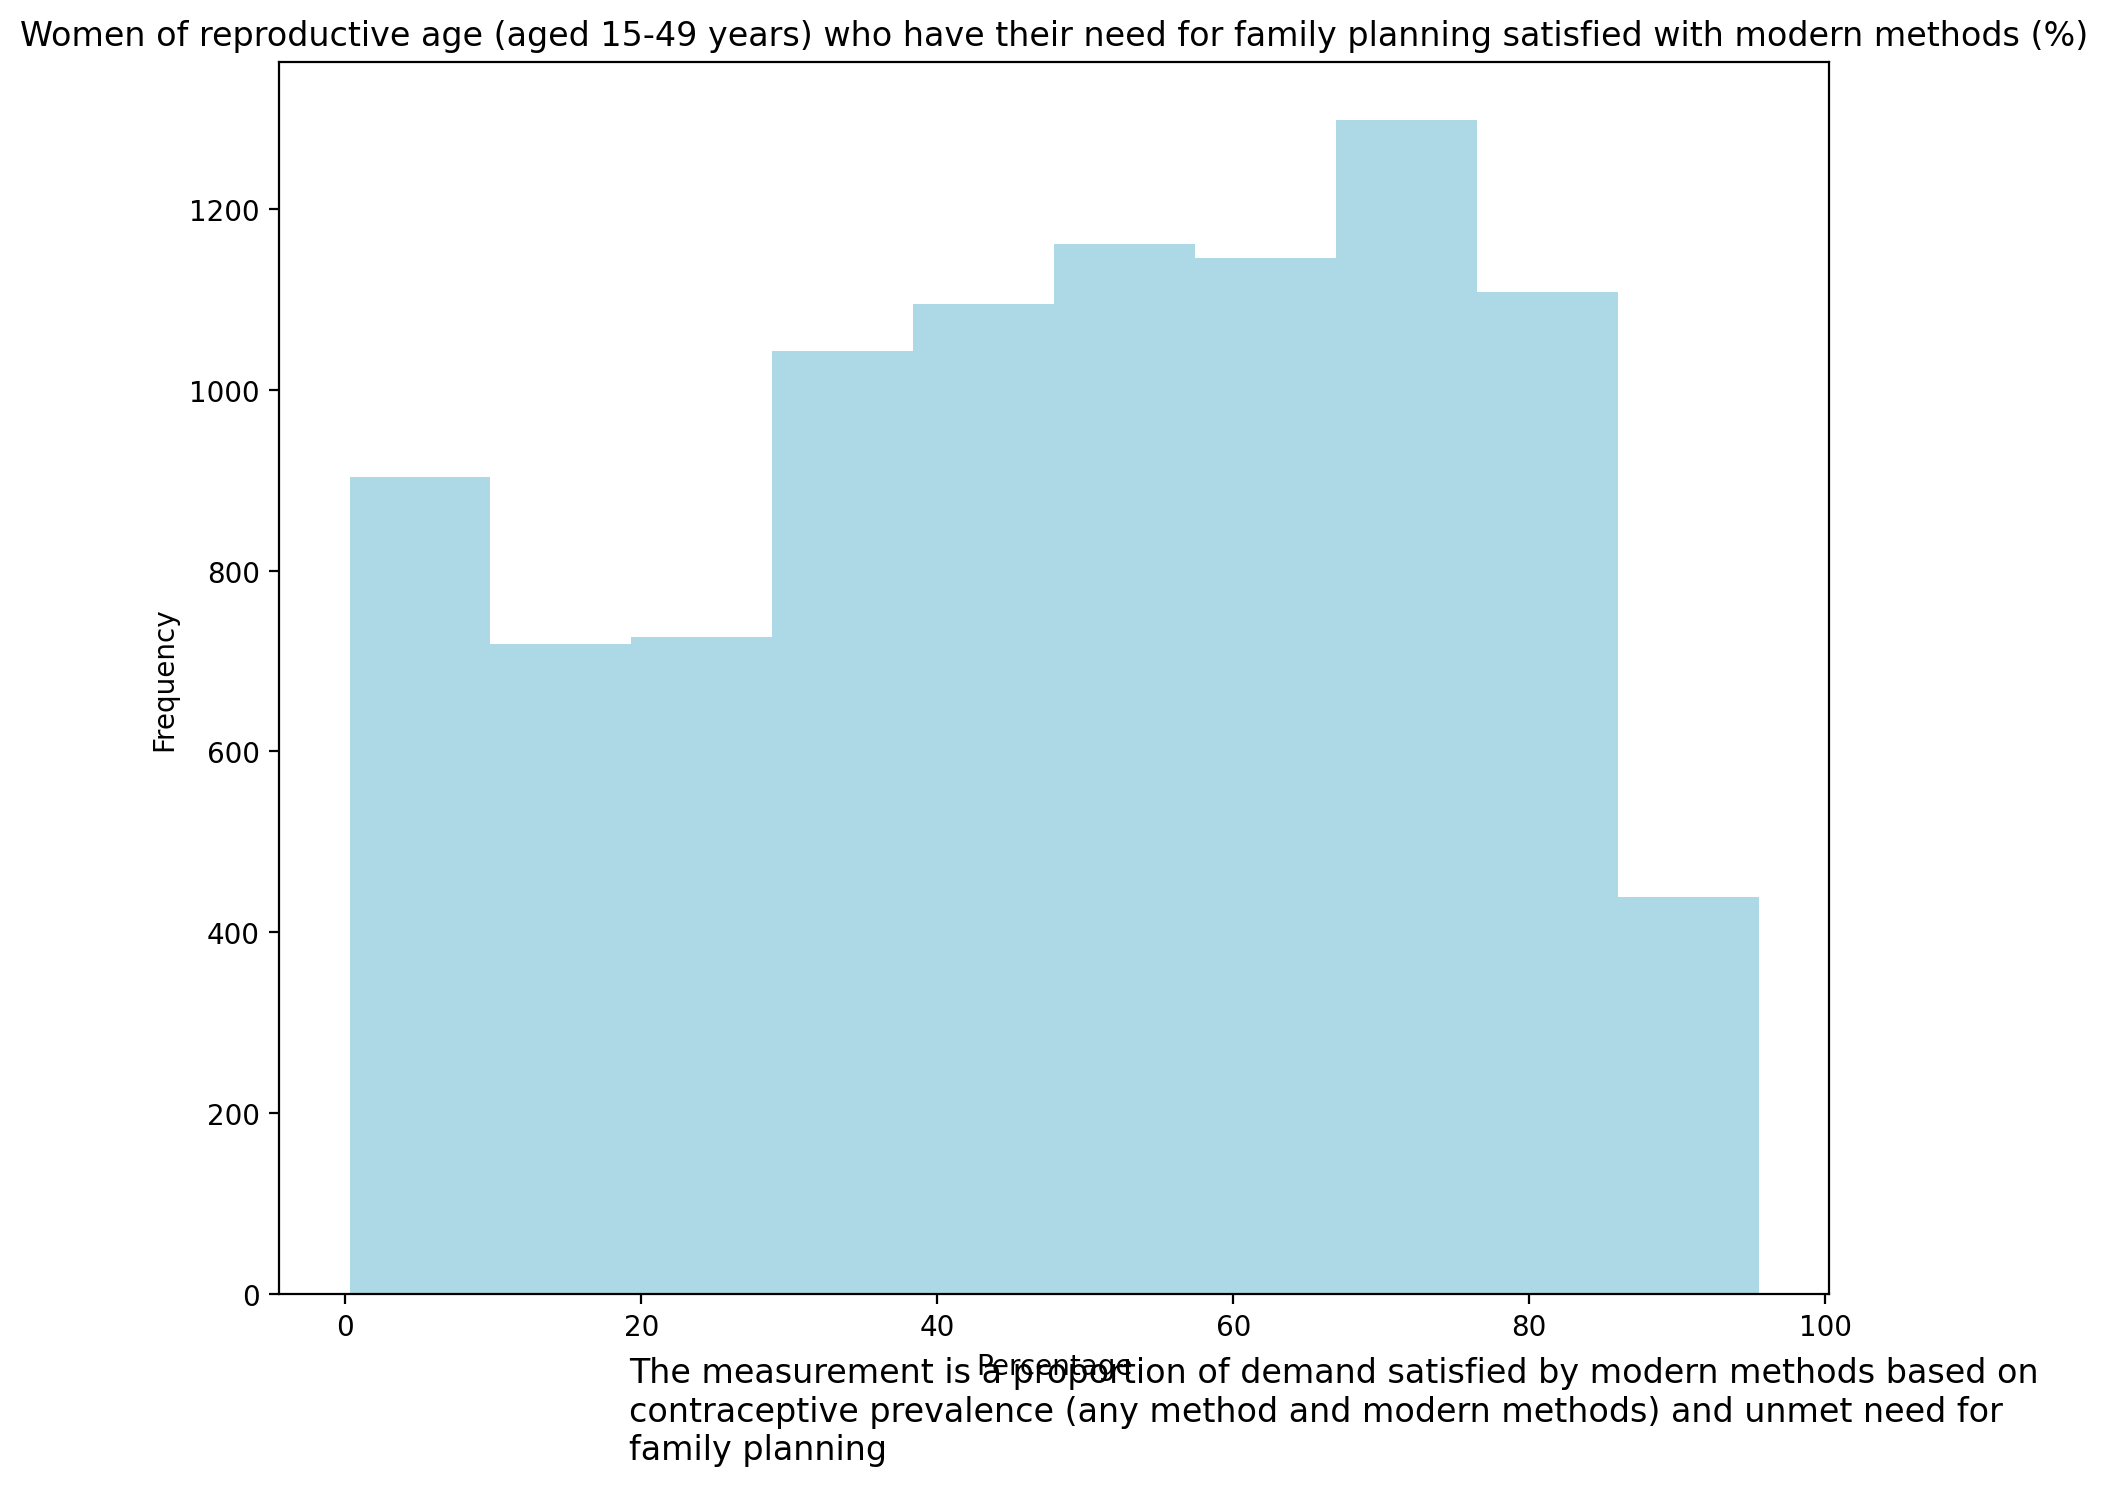

In [272]:
plt.figure(figsize=(10,8),dpi=200)
plt.hist(family_planning1.iloc[:,2],color='lightblue')
plt.title('{}'.format(family_planning1.columns[2]))
plt.xlabel("Percentage")
plt.ylabel("Frequency")
caption='The measurement is a proportion of demand satisfied by modern methods based on contraceptive prevalence (any method and modern methods) and unmet need for family planning'
plt.figtext(0.3,0.01,caption,wrap=True,fontsize=12)

proportion of childbirths attended by professional health personnel (generally doctors, nurses or midwives or other health professionals providing childbirth care


Text(0.5, 0.01, 'Measurement: Births attended by skilled health personnel = (Number of births attended by skilled health personnel / Total number of live births) x 100')

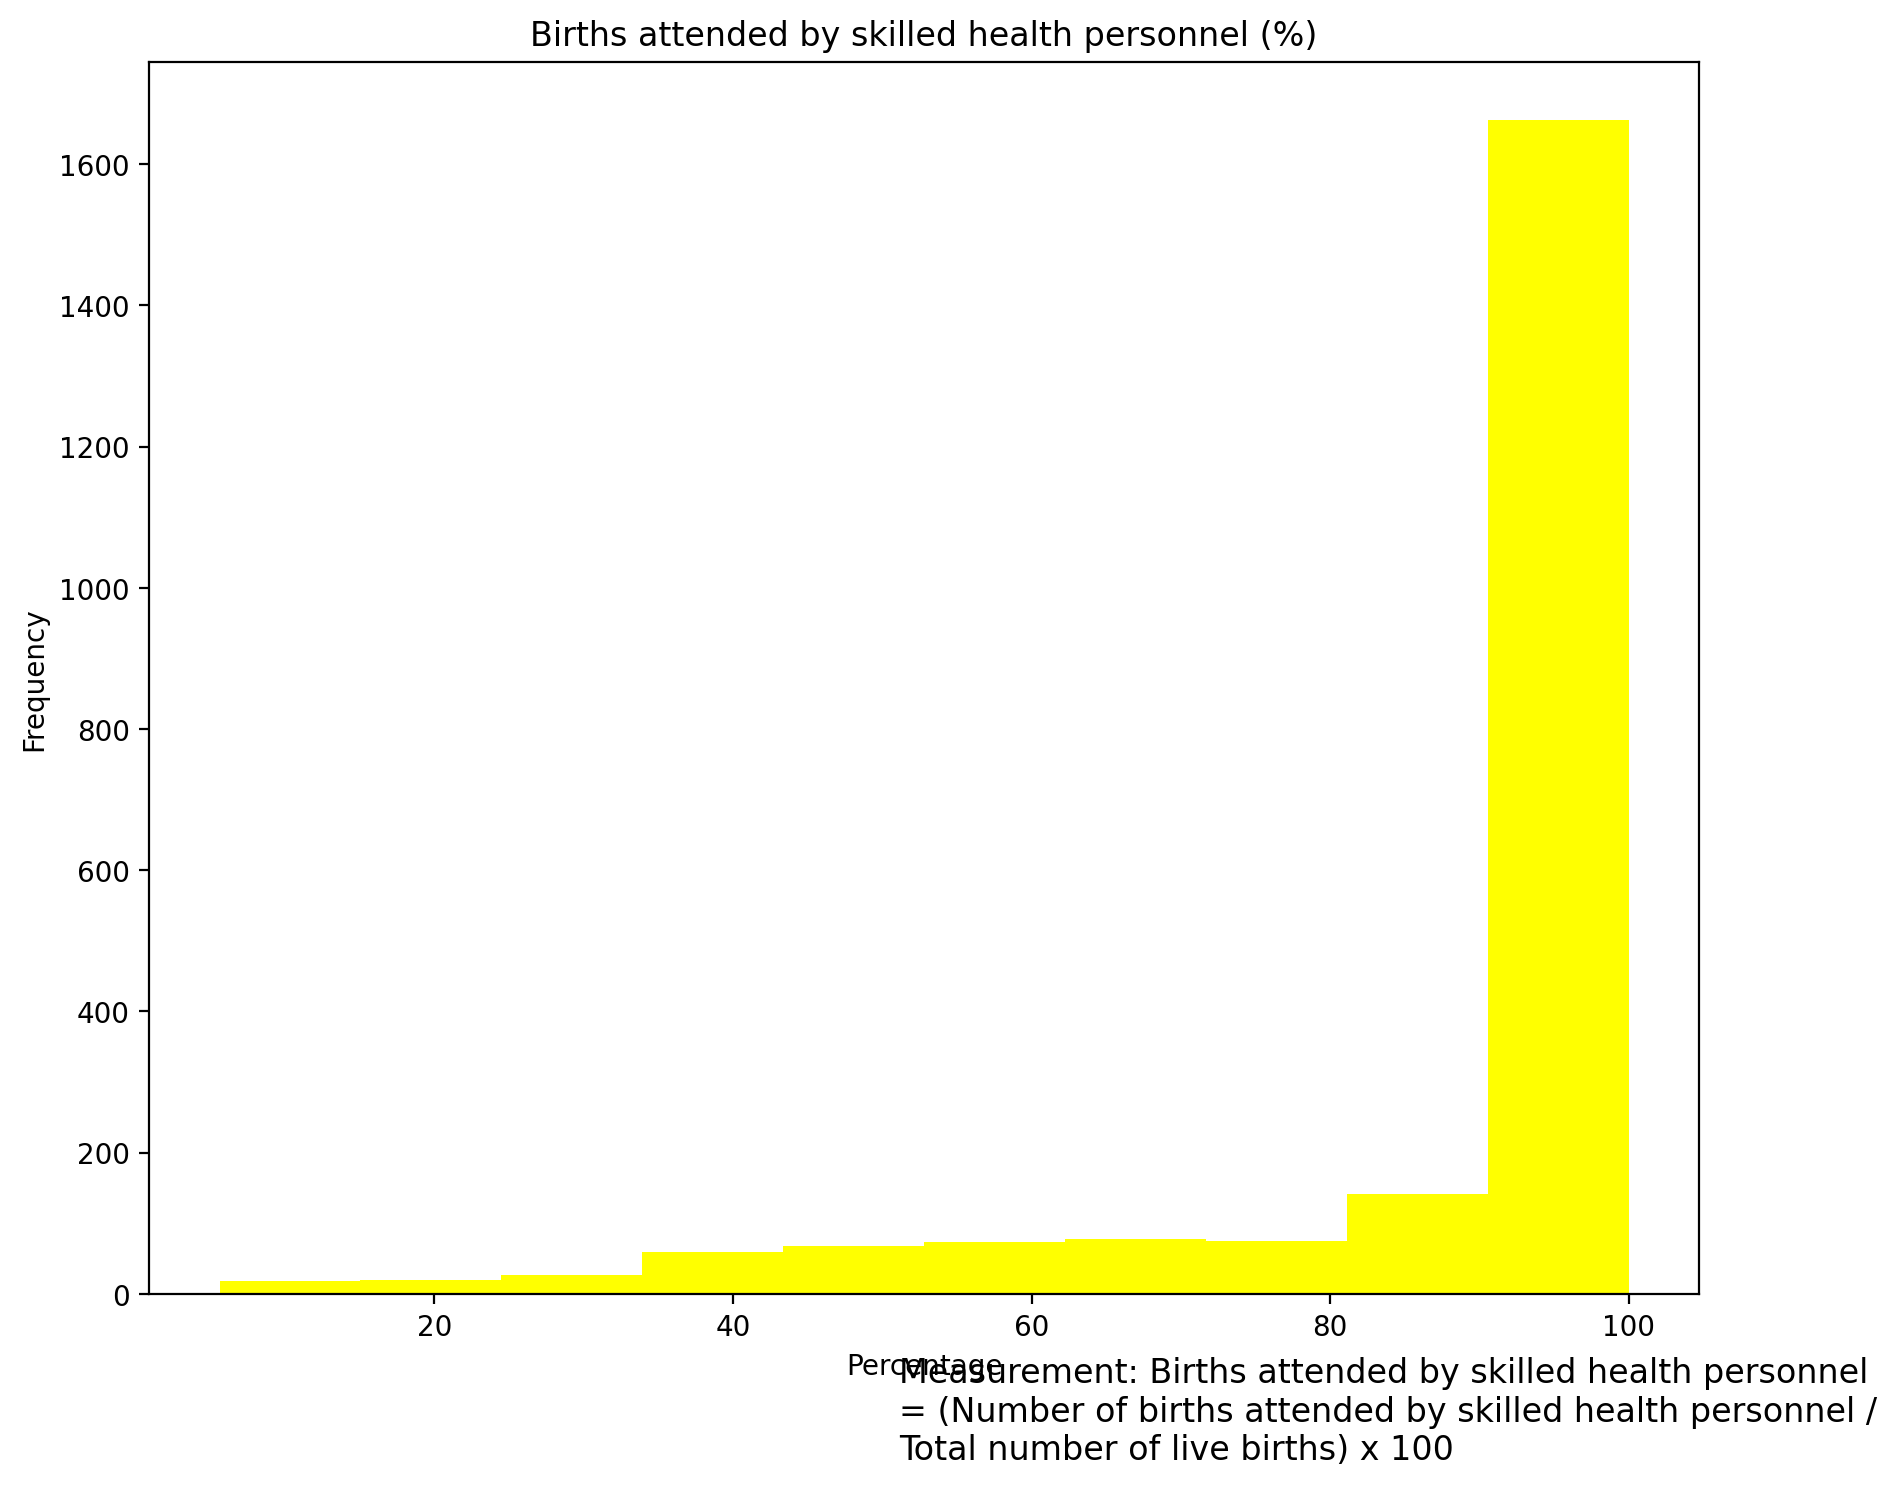

In [229]:

plt.figure(figsize=(10,8),dpi=200)
plt.hist(birth_attended1.iloc[:,2],color='yellow')
plt.title('{}'.format(birth_attended1.columns[2]))
plt.xlabel("Percentage")
plt.ylabel("Frequency")
print("proportion of childbirths attended by professional health personnel (generally doctors, nurses or midwives or other health professionals providing childbirth care")
txt="Measurement: Births attended by skilled health personnel = (Number of births attended by skilled health personnel / Total number of live births) x 100"
plt.figtext(0.5,0.01,txt,wrap=True,fontsize=12)

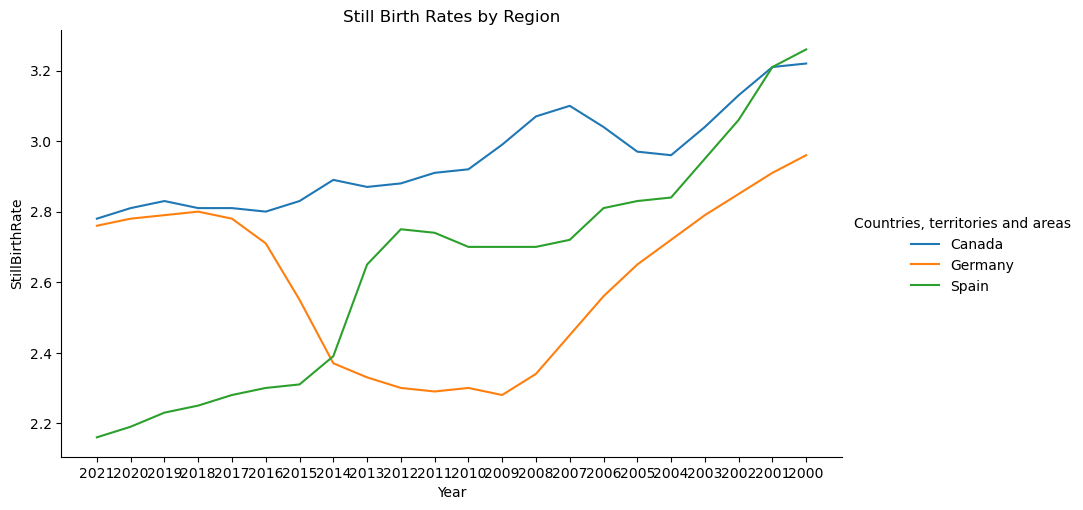

In [274]:

df_some = stillbirth_melted[stillbirth_melted["Countries, territories and areas"].isin(["Germany", "Canada", "Spain"])]
g = sns.relplot(kind='line', data=df_some, x='Year', y='StillBirthRate', hue='Countries, territories and areas', aspect=1.75).set(title="Still Birth Rates by Region")

In [275]:
# !pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='http')
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [ ]:
# !pip install folium
from folium.plugins import MarkerCluster
#empty map
import folium
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
# #for each coordinate, create circlemarker of user percent
for i in merged_with_output["Countries, territories and areas"]:
#     print(i)
    lat,long = geolocate(i)
#     print(lat,long)
    merged_with_output['Latitude'] = lat
    merged_with_output['Longitude'] = long
merged_with_output.head(10)
#     radius=5
#     popup_text = """Country : {}<br>
#                 %of Users : {}<br>"""
#     popup_text
# # # Create a wo

In [277]:
world_map